In [14]:
from MultiTrackingSystem import MultiTrackingSystem
import matplotlib.pyplot as plt
import numpy as np

In [4]:
folder = r'./frames/2019-8-27-7-0-0-BF1(0-18000frames)/{}'
os.chdir(r'/Users/czhui960/Documents/Lidar/to ZHIHUI/US 395')
frames_name = os.listdir(r'./frames/2019-8-27-7-0-0-BF1(0-18000frames)/')
frames_name.sort(key = lambda x : x.split(' ')[2][:-5])

In [5]:
multi_tracking = MultiTrackingSystem(1800,3,gen_fig=False)

In [6]:
multi_tracking.fit_dbgen(folder, frames_name,1.9,10)

In [7]:
multi_tracking.batch_tracking()

100%|██████████| 1799/1799 [01:24&lt;00:00, 21.32it/s]


In [6]:
multi_tracking.svae_gif()

Gif successfully saved


In [8]:
len(multi_tracking.out_of_tracking_list.keys())

1252

In [9]:
length = []
for key in range(len(multi_tracking.out_of_tracking_list.keys())):
    length.append(len(multi_tracking.out_of_tracking_list[key].detected_centers))
    

In [15]:
length = np.array(length)

In [73]:
np.where((length>120))

(array([  5,   7,  57, 101, 167, 285, 368, 376]),)

In [50]:
length.argmax()

368

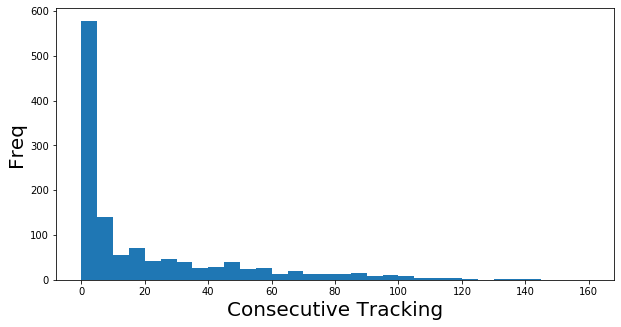

In [17]:
plt.figure(figsize=(10,5))
plt.hist(length,bins=np.arange(0,165,5))
plt.xlabel('Consecutive Tracking',fontsize = 20)
plt.ylabel('Freq',fontsize = 20)
plt.show()

In [56]:
x_lim = [-80, 70]
y_lim = [-20, 60]

In [91]:
def show_detected_traj(obj):
    plt.figure(figsize=(10,5))
    # plt.ylim(y_lim[0],y_lim[1]) # figure height is 80
    # plt.xlim(x_lim[0],x_lim[1]) # length is 150
    detected_centers = np.concatenate([obj.detected_centers[i].reshape(1,-1) for i in range(len(obj.detected_centers)) if type              (obj.detected_centers[i]) != int])
    estimated_centers = np.concatenate([obj.estimated_centers[i].reshape(1,-1) for i in range(len(obj.estimated_centers))])
    detected_point_clouds = np.concatenate([obj.point_clouds[i] for i in range(len(obj.detected_centers)) if type(obj.detected_centers[i]     ) != int])
    detected_box = [obj.bounding_boxes[i] for i in range(len(obj.detected_centers)) if type(obj.detected_centers[i]) != int]
    plt.plot(estimated_centers[:,0],estimated_centers[:,1],marker = 'o',label = 'Est')
    plt.plot(detected_centers[:,0],detected_centers[:,1], marker = 'x', label = 'Mea')
    plt.legend(fontsize = 20)
    # plt.scatter(detected_point_clouds[:,0],detected_point_clouds[:,1],s = 3)
    # for i in range(len(detected_box)):
    #     plt.plot(detected_box[i][:,0],detected_box[i][:,1],c = 'r',alpha = 0.3) # box
    #     plt.plot(detected_box[i][[0,-1],0],detected_box[i][[0,-1],1],c = 'r',alpha = 0.3)
    plt.show()

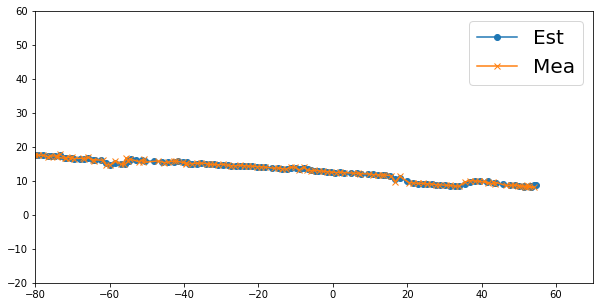

In [92]:
obj = multi_tracking.out_of_tracking_list[57]
show_detected_traj(obj)